# Text Minning

Text Mining is also known as Text Data Mining or Text Analytics or is an artificial intelligence (AI) technology that uses natural language processing (NLP) to extract essential data from standard language text. It is a process to transform the unstructured data (text in emails, reviews, documents, databases) into structured data to derive critical insights and perform different machine learning algorithms.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
elon=pd.read_csv('Elon_musk.csv',encoding='cp1252')

In [ ]:
elon.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
elon.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [ ]:
elon.shape

(1999, 2)

In [ ]:
# Dropping Unwanted Columns.
elon.drop(['Unnamed: 0'],inplace=True,axis=1)
elon.head()

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


# Data Exploration

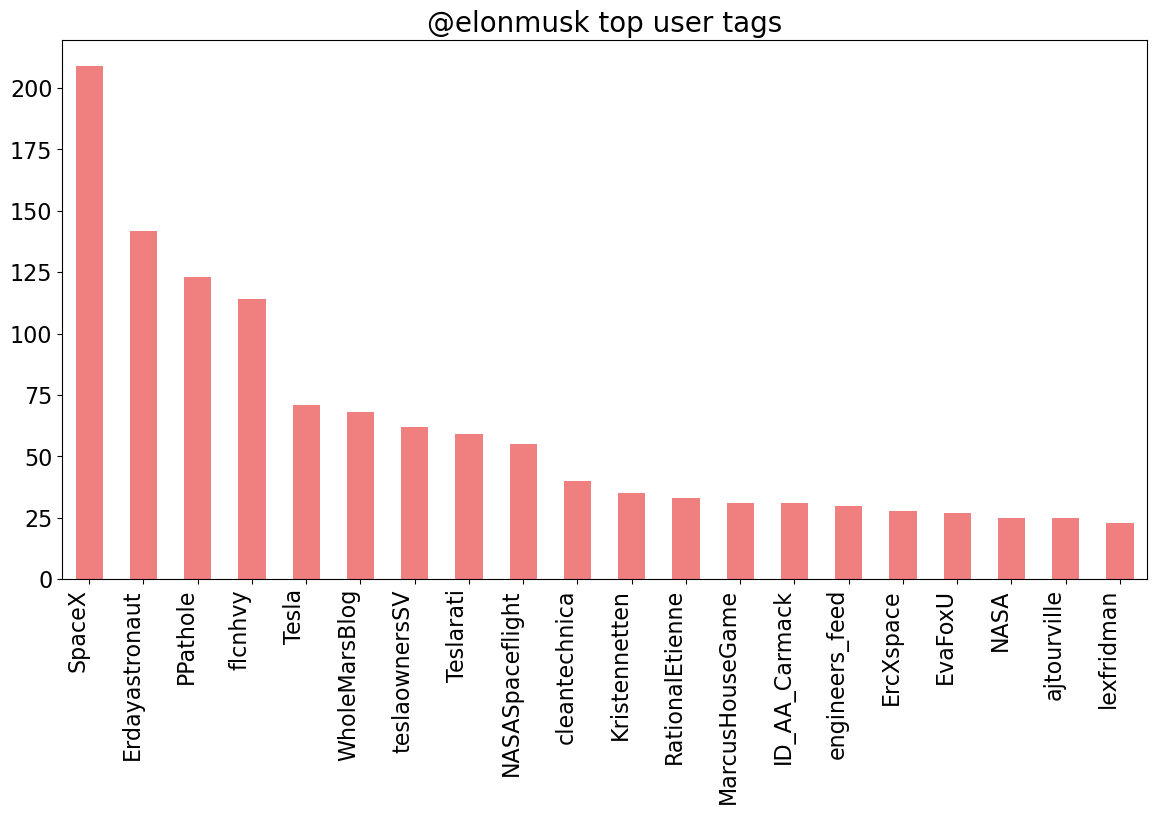

In [ ]:
# Barplot of Most(Top 20) used Tweet Tags in the Given Text.
import itertools

c = list(itertools.chain(*elon.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

# Basic Text PreProcressing


In [ ]:
# Cleaning The Text by Removing The Irrelevant Information like commas ,special Symbols,colons,semi colons etc.
import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

elon["Text"] = elon["Text"].apply(clean_text) # Clean The Text
elon.head(11)

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
5,happy new year of the ox
6,frodo was the underdoge\nall thought he would ...
7,owensparks flcnhvy haha thanks
8,flcnhvy indeed tweets definitely do not repre...
9,the most entertaining outcome is the most likely


# Word Frequency

In [ ]:
# Finding The Most Used or Most Occurring Word In all the Text Data.
freq = pd.Series(' '.join(elon['Text']).split()).value_counts()[:20] # for top 20
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
dtype: int64

# Removing StopWords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
elon['Text'] = elon['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Text Data After Removing The StopWords.
elon['Text']

0                                                im alien
1       idaacarmack ray tracing cyberpunk hdr nextleve...
2                        joerogan spotify great interview
3                                     doge underestimated
4       teslacn congratulations tesla china amazing ex...
                              ...                        
1994    flcnhvy true sounds surreal negative propagand...
1995    ppathole make sure read ur terms amp condition...
1996                    teslagong ppathole samwise gamgee
1997                           ppathole altho dumb dumber
1998                               progress update august
Name: Text, Length: 1999, dtype: object

In [ ]:
# Word Frequency After Removing The StopWords.
freq_stp = pd.Series(' '.join(elon['Text']).split()).value_counts()[:20] # for top 20
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
dtype: int64

# Count Vectorizer
1. It is one of the simplest ways of doing text vectorization.

2. It creates a document term matrix, which is a set of dummy variables that indicates if a particular word appears in the document.

3. Count vectorizer will fit and learn the word vocabulary and try to create a document term matrix in which the individual cells denote the frequency of that word in a particular document, which is also known as term frequency, and the columns are dedicated to each word in the corpus.

# Basic Feature Extraction

In [ ]:
# CountVectorizer Tells frequency of the Words in the Text data.
# CountVectorizer to convert a collection of text data (tweets in this case) into a matrix of token counts.
# It then creates a DataFrame to represent word frequencies in the text data.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(elon["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

,term,occurrences,frequency
0,aber,1,0.000076
1,able,6,0.000453
2,abo,1,0.000076
3,aboard,1,0.000076
4,abort,3,0.000227
5,absence,1,0.000076
6,absolute,1,0.000076
7,absolutely,15,0.001133
8,absorb,1,0.000076
9,absorption,1,0.000076


# TFIDF - Term frequency -inverse Document Frequency
Term frequency-inverse document frequency ( TF-IDF) gives a measure that takes the importance of a word into consideration depending on how frequently it occurs in a document and a corpus.

### Term Frequency
Term frequency denotes the frequency of a word in a document. For a specified word, it is defined as the ratio of the number of times a word appears in a document to the total number of words in the document.

It is the percentage of the number of times a word (x) occurs in a particular document (y) divided by the total number of words in that document.

### Inverse Document Frequency
It measures the importance of the word in the corpus. It measures how common a particular word is across all the documents in the corpus.

It is the logarithmic ratio of no. of total documents to no. of a document with a particular word.


In [ ]:
# TF-IDF method is that each cell doesn’t indicate the term frequency,
# but contains a weight value that signifies how important a word is for an individual text message or document
# TF-IDF gives more weight to less frequently occurring events and less weight to expected events.
# So, it penalizes frequently occurring words that appear frequently in a document such as “the”, “is” but assigns greater weight to less frequent or rare words.
# The product of TF x IDF of a word indicates how often the token is found in the document and how unique the token is to the whole entire corpus of documents.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(elon["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterdays,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-grams Vectorization
1. Similar to the count vectorization technique, in the N-Gram method, a document term matrix is generated, and each cell represents the count.

2. The columns represent all columns of adjacent words of length n.

3. Count vectorization is a special case of N-Gram where n=1.

4. N-grams consider the sequence of n words in the text; where n is (1,2,3.. ) like 1-gram, 2-gram. for token pair. Unlike BOW, it maintains word order.

# Bi-Gram

In [ ]:
# the most frequent bi-grams in a corpus.
# takes a corpus of text data as input and returns the top n bi-grams (two consecutive words) based on their frequency in the corpus.
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
# Top 200 Bi-Grams .
top2_words = get_top_n2_words(elon["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,pretty much,12
4,rt nasa,12
5,waemd spacex,11
6,giga berlin,10
7,first stage,10
8,teslaratiteam teslarati,10
9,nasa spacex,9


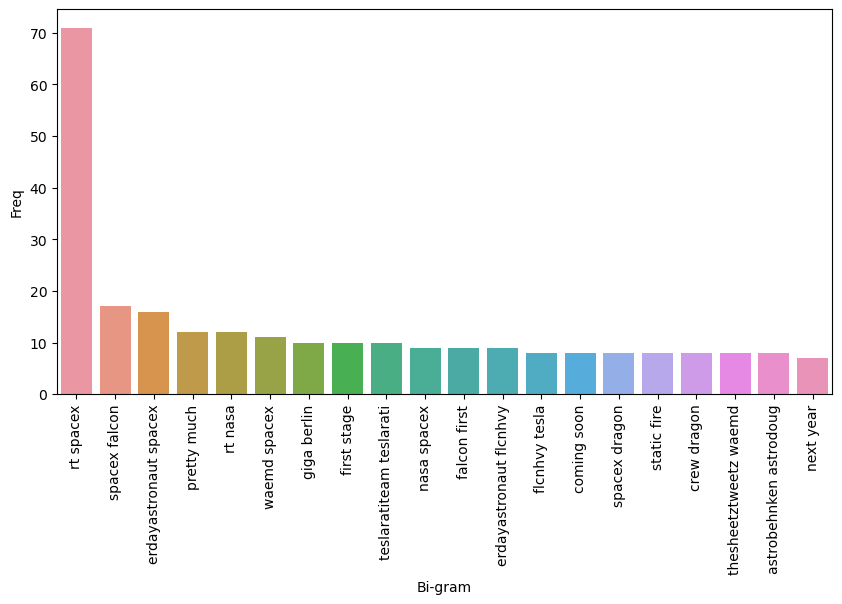

In [ ]:
# Barplot of top20 Bi-Grams.
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

# Tri-Gram
For Example,

“I am studying NLP” has four words and n=4.

if n=2, i.e bigram, then the columns would be — [“I am”, “am reading”, ‘studying NLP”]

if n=3, i.e trigram, then the columns would be — [“I am studying”, ”am studying NLP”]

if n=4,i.e four-gram, then the column would be -[‘“I am studying NLP”]

In [ ]:

def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
top3_words = get_top_n3_words(elon["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
5,ppathole thesheetztweetz waemd,7
6,waemd spacex spacexstarlink,7
7,first stage landed,6
8,rt spacex liftoff,6
9,spacex spacexstarlink wanationalguard,6


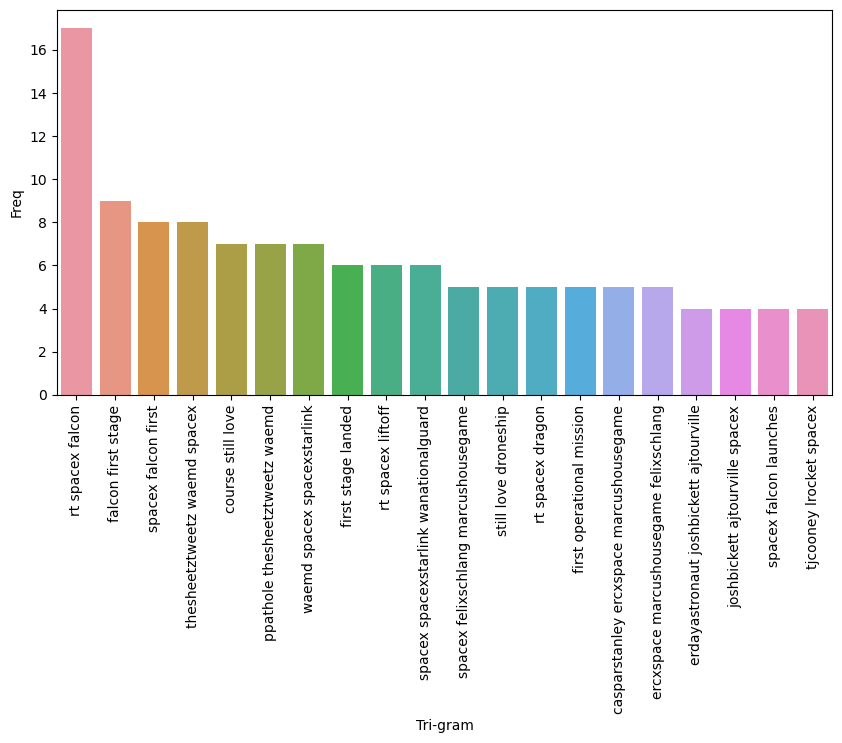

In [ ]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

# Creating A WordCloud
The word cloud visually represents the frequency of words in the input text . Words that appear more frequently in the text will be displayed with larger fonts.

In [ ]:
string_Total = " ".join(elon["Text"])

In [ ]:
!pip install wordcloud


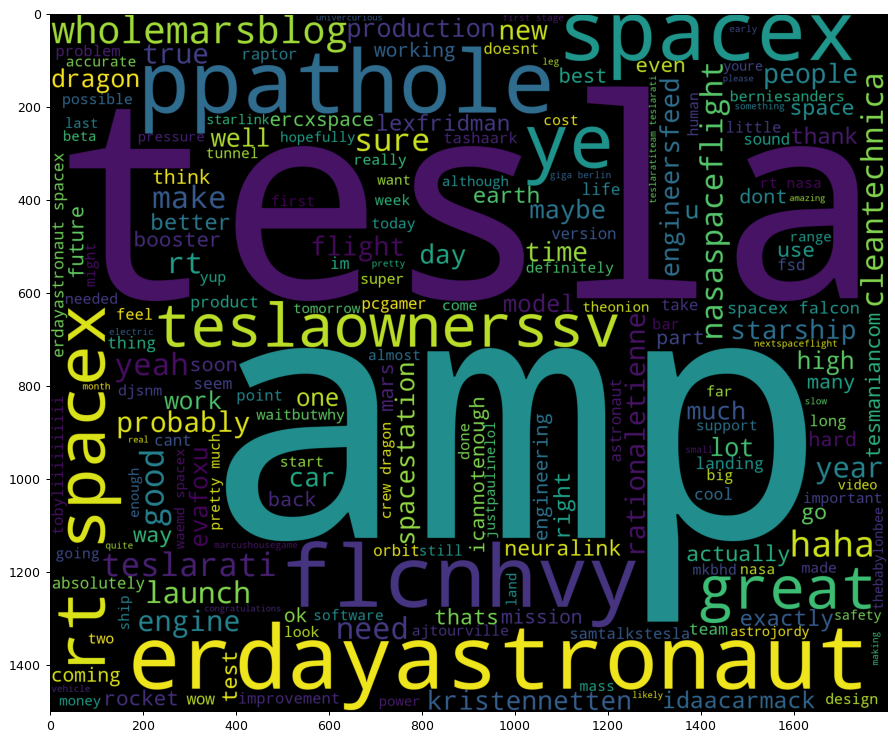

In [ ]:
# Wordcloud For Entire Corpus.
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

In [ ]:
!pip install textblob

# Sentiment Analysis
Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique for determining the positivity, negativity, or neutrality of data.

### Subjectivity:

##### Definition: Subjectivity refers to the extent to which a statement is influenced by personal opinions, feelings, or emotions rather than factual information. It measures how subjective or objective a piece of text is.
Scale: Subjectivity is often measured on a scale from 0 to 1, where 0 represents completely objective (factual) and 1 represents completely subjective (opinionated).
### Polarity:

##### Definition: Polarity measures the sentiment expressed in a piece of text. It indicates whether the expressed sentiment is positive, negative, or neutral.
Scale: Polarity is often measured on a scale from -1 to 1, where -1 represents a highly negative sentiment, 0 represents a neutral sentiment, and 1 represents a highly positive sentiment.


In [ ]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
elon[["subjectivity", "polarity"]] = elon.apply(sentiment_analysis, axis=1)
elon.head(11)

,Text,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
5,happy new year ox,0.727273,0.468182
6,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,owensparks flcnhvy haha thanks,0.250000,0.200000
8,flcnhvy indeed tweets definitely represent rea...,0.500000,0.000000
9,entertaining outcome likely,0.850000,0.250000


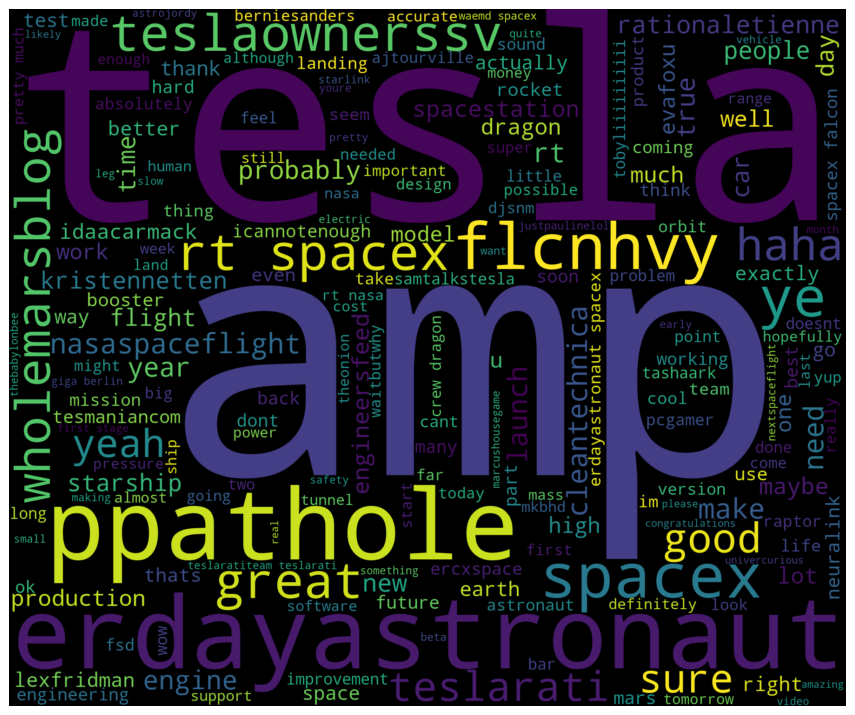

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in elon["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Sentiment Analysis using SentimentIntensityAnalyzer .
# The SIA approach is based on intensity scores.
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# Sentiment Analysis using TextBlob Library.
# the TextBlob approach uses polarity scores.
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [ ]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Create a New Analysis Column
elon["analysis"] = elon["polarity"].apply(analysis)

In [ ]:
positive_tweets = elon[elon['analysis'] == 'Positive']
negative_tweets = elon[elon['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


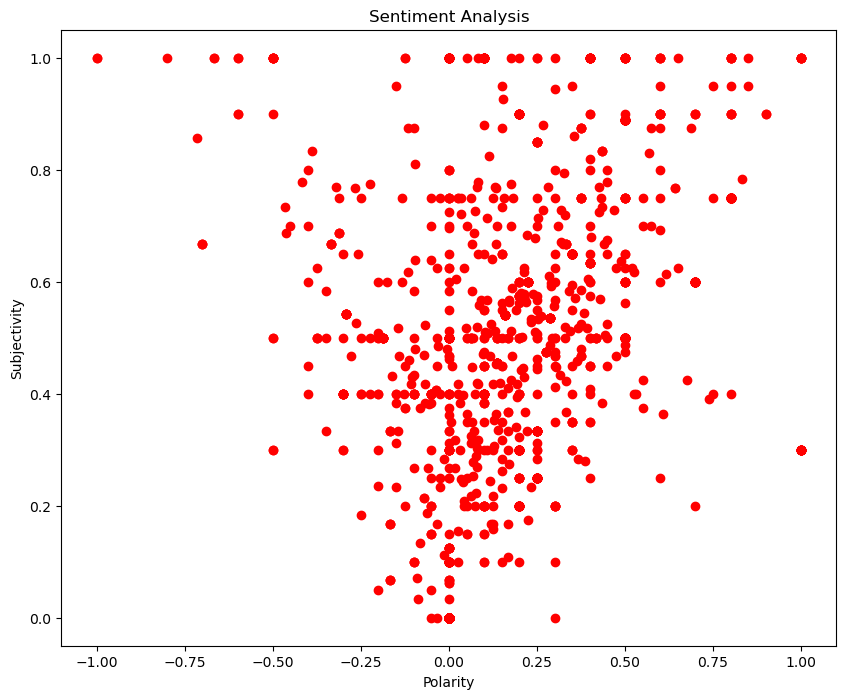

In [ ]:
plt.figure(figsize=(10, 8))

for i in range(0, elon.shape[0]):
    plt.scatter(elon["polarity"][i], elon["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [ ]:
(len(positive_tweets) / len(negative_tweets))*100

422.11055276381904